In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Include OneHotEncoder here
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2


In [49]:
#!pip install openpyxl 

In [50]:
# Define the file path
file_path = r'C:\Users\meht1\Documents\COMP5310\Assignment2\clean_data.xlsx'

# Load the Excel file into a DataFrame
d = pd.read_excel(file_path)
data = d

In [51]:
# Filter rows based on conditions and keep rows that don't meet the criteria
filtered_data = data[(data['Age'] <= 15)]
# Check the number of rows removed
rows_removed = len(data) - len(filtered_data)
data = filtered_data
    
filtered_data = data[(data['condition'] >= 20)]
# Check the number of rows removed
rows_removed = len(data) - len(filtered_data)
data = filtered_data
    
filtered_data = data[(data['odometer'] <= 100000)]
# Check the number of rows removed
rows_removed = len(data) - len(filtered_data)
data = filtered_data

In [52]:
# Display descriptive statistics for numerical variables
numerical_stats = data.describe()
print("Descriptive Statistics for Numerical Variables:")
print(numerical_stats)

# Display summary statistics for categorical variables
categorical_stats = data.describe(include=['object'])
print("\nSummary Statistics for Categorical Variables:")
print(categorical_stats)

Descriptive Statistics for Numerical Variables:
        transmission      condition       odometer            mmr  \
count  327585.000000  327585.000000  327585.000000  327585.000000   
mean        0.855329      37.526465   44335.998086   15341.129096   
std         0.351769       7.140210   24589.250487    6388.255022   
min         0.000000      21.000000       1.000000     475.000000   
25%         1.000000      33.000000   25035.000000   10800.000000   
50%         1.000000      38.000000   39357.000000   14100.000000   
75%         1.000000      43.000000   61024.000000   19550.000000   
max         1.000000      49.000000  100000.000000   33000.000000   

       sellingprice            Age  
count  327585.00000  327585.000000  
mean    15352.26072       3.271627  
std      6392.56240       2.360860  
min         1.00000       0.000000  
25%     10750.00000       2.000000  
50%     14100.00000       3.000000  
75%     19500.00000       4.000000  
max     33100.00000      15.000000

In [53]:
# Define features (X) and target variable (y)
features = [ 'model', 'transmission', 
                'odometer', 'mmr', 'Age', 'condition']
target = 'sellingprice'

X = data[features]
y = data[target]

In [54]:
#EDA
# Categorical columns (excluding 'condition')
categorical_cols = [ 'model', 'transmission' ]
# Preprocessor for categorical columns (one-hot encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Numerical columns (including 'odometer', 'mmr', 'Age', 'condition')
numerical_cols = ['odometer', 'mmr', 'Age', 'condition']

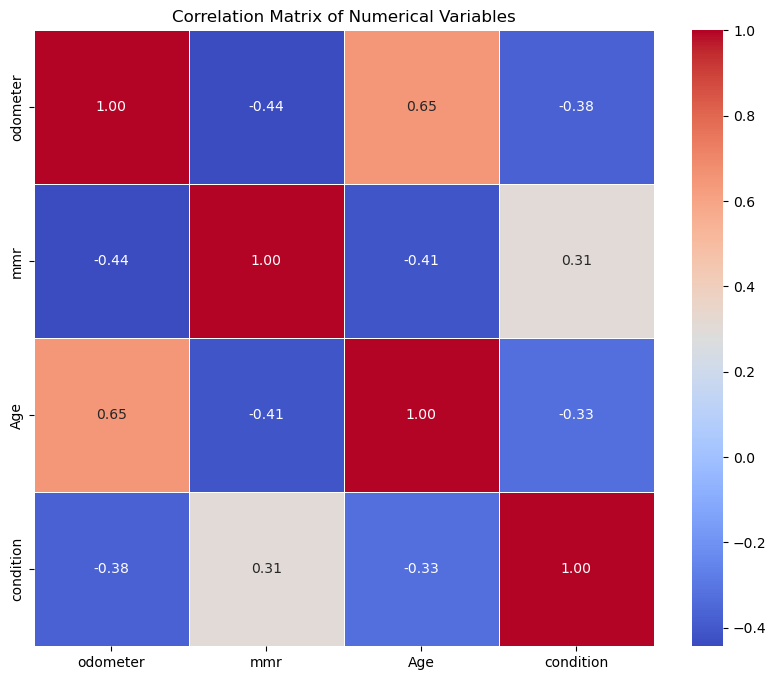

In [55]:
#Correlation Matrix
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

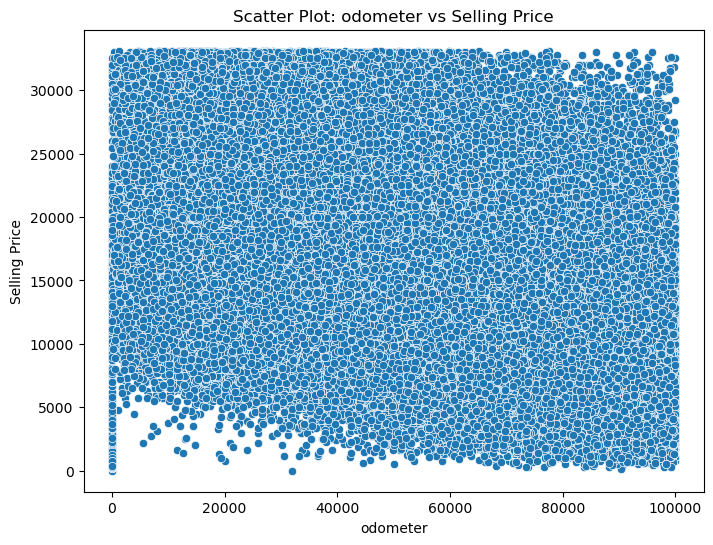

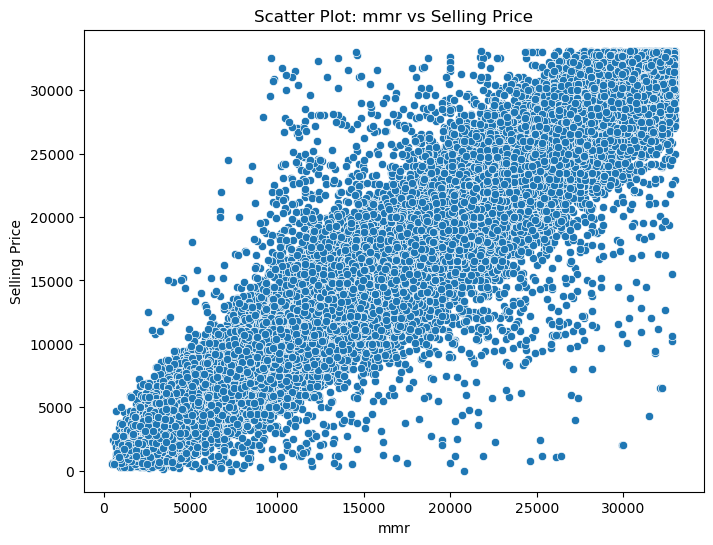

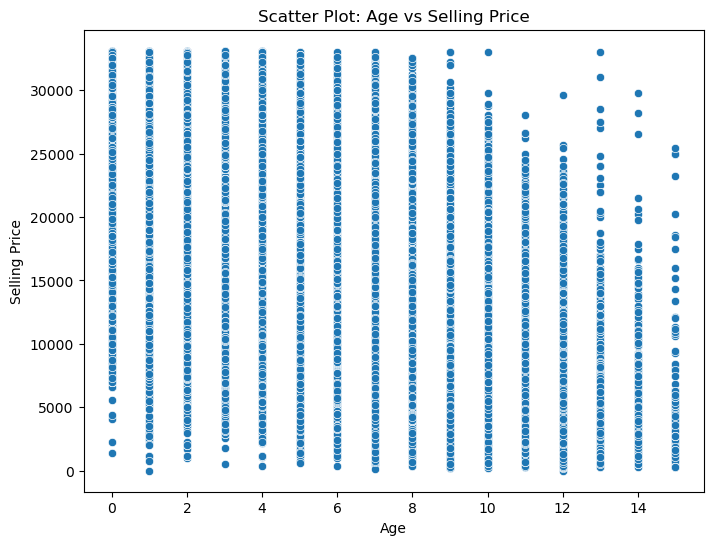

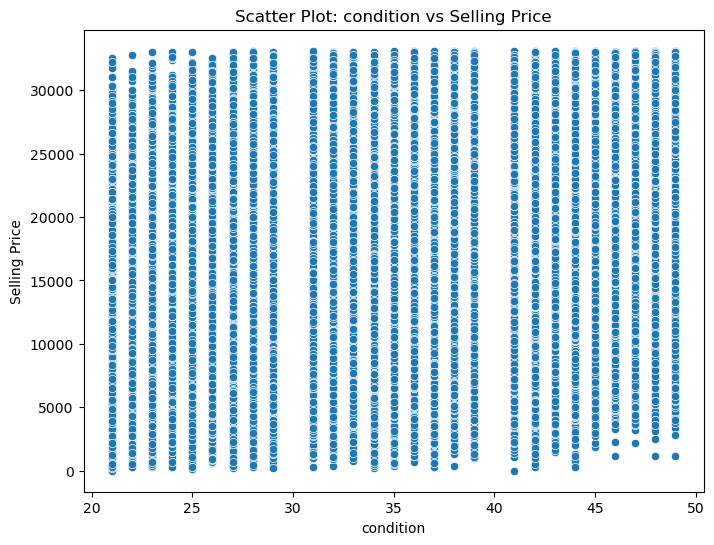

In [56]:
#Categorical Variables against Selling Price
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  
    sns.scatterplot(x=col, y='sellingprice', data=data)
    plt.title(f'Scatter Plot: {col} vs Selling Price')
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    plt.show()  # Display each scatter plot separately

In [57]:
for col in categorical_cols:
    unique_values = data[col].nunique()  # Number of unique values in the column
    counts = data[col].value_counts()
    print(f"Count of {col} (Unique values: {unique_values}):")
    print(counts)
    print()  # Add a blank line between each column's counts

Count of model (Unique values: 631):
Altima             15227
Fusion             10741
Escape              9147
Camry               8351
F-150               8072
                   ...  
Tribute Hybrid         1
Blackwood              1
S70                    1
Ram Cargo              1
C/K 3500 Series        1
Name: model, Length: 631, dtype: int64

Count of transmission (Unique values: 2):
1    280193
0     47392
Name: transmission, dtype: int64



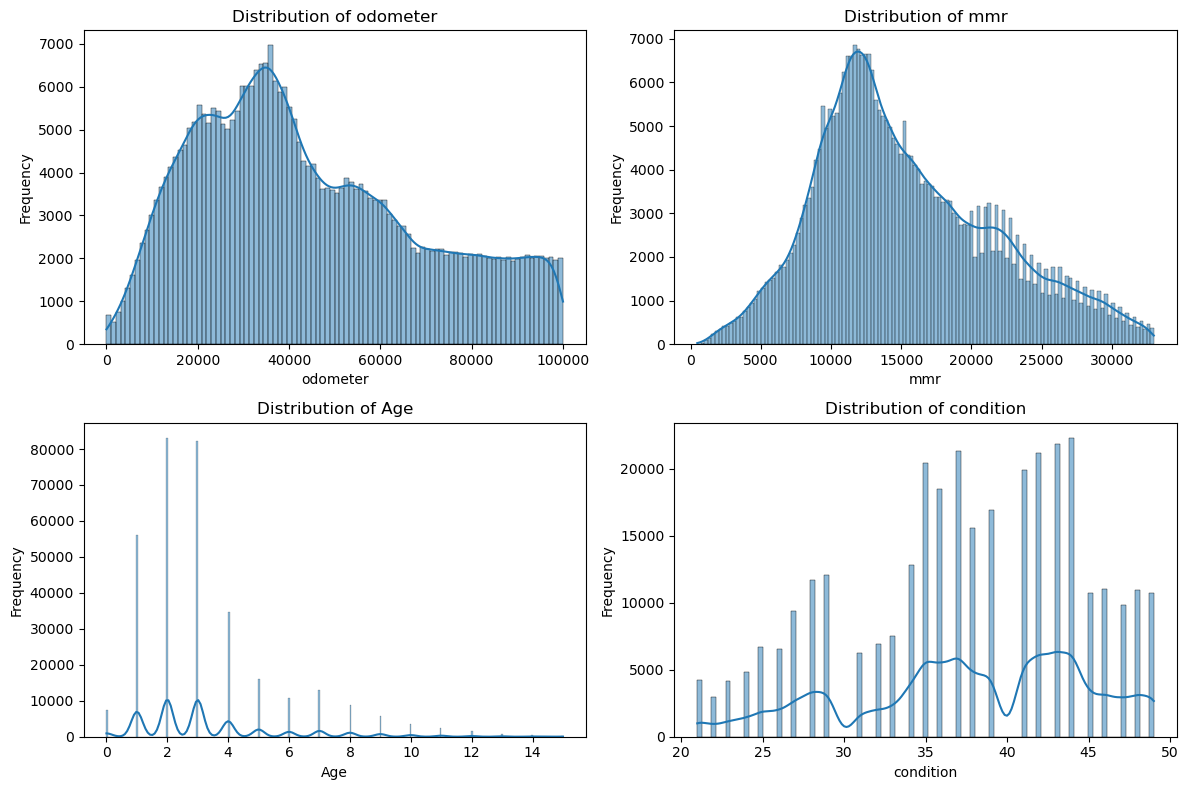

In [58]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Preprocess data: Convert categorical variables to numeric (example: one-hot encoding)
X_train_encoded = pd.get_dummies(X_train, columns=[ 'model'])

# Standardize numerical columns
numerical_cols = ['transmission', 'odometer', 'mmr', 'Age', 'condition']
scaler = StandardScaler()
X_train_encoded[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
    
# Add constant for intercept in Linear Regression
X_train_preprocessed = sm.add_constant(X_train_encoded)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y_train, X_train_preprocessed)
results = model.fit()

# Print statistical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     9477.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        21:44:30   Log-Likelihood:            -2.2534e+06
No. Observations:              262068   AIC:                         4.508e+06
Df Residuals:                  261440   BIC:                         4.515e+06
Df Model:                         627                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [60]:
# Calculate residuals
y_pred = results.predict(X_train_preprocessed)
residuals = y_train - y_pred

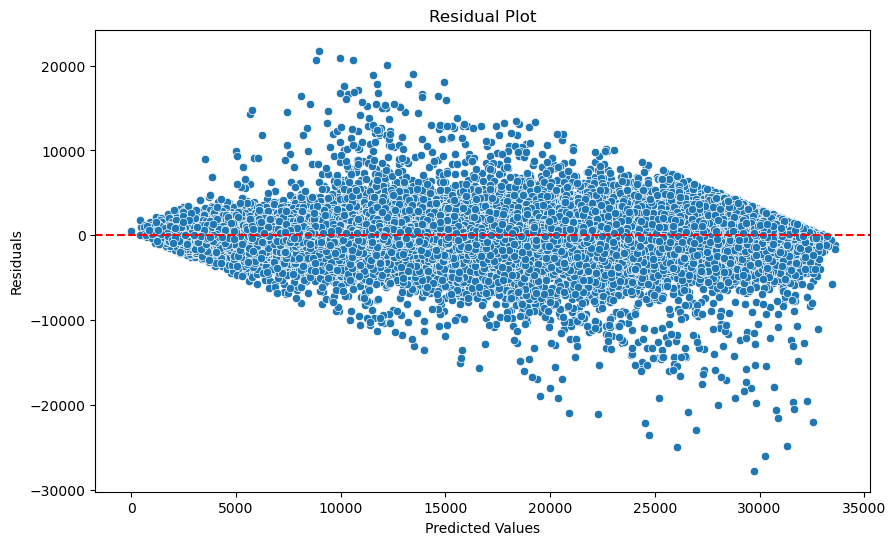

In [61]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

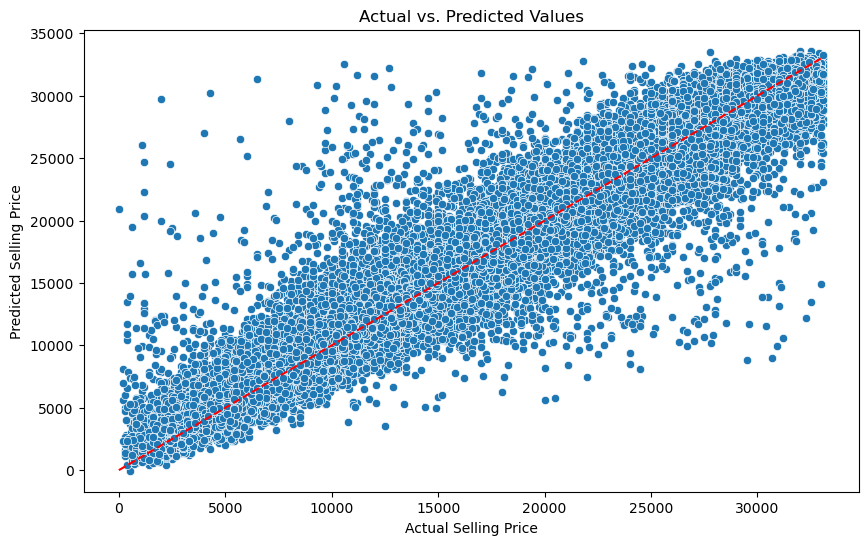

In [62]:
# Actual vs. Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

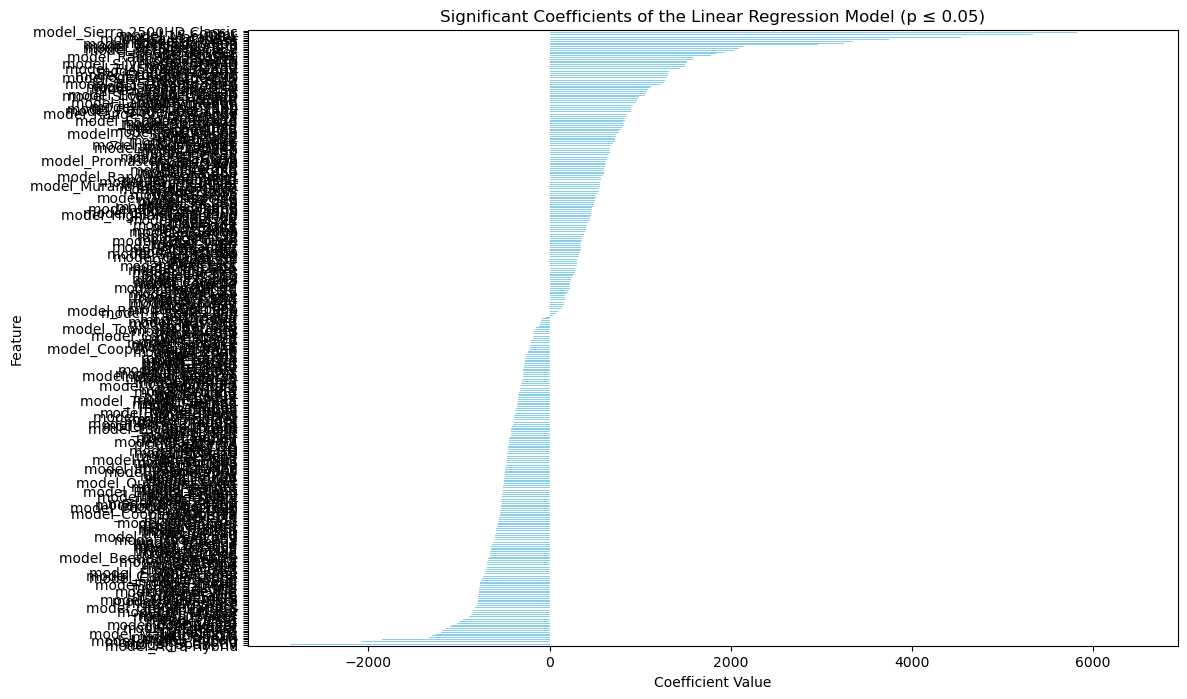

In [63]:
# Coefficient plot showing only significant coefficients (p ≤ 0.05)
plt.figure(figsize=(12, 8))

# Filter coefficients based on p-values and exclude 'const' if present
significant_coefficients = results.params[results.pvalues <= 0.05]
if 'const' in significant_coefficients.index:
    significant_coefficients = significant_coefficients.drop('const')

# Check if there are any significant coefficients remaining after filtering
if not significant_coefficients.empty:
    # Sort and plot significant coefficients
    significant_coefficients.sort_values().plot(kind='barh', color='skyblue')

    plt.title('Significant Coefficients of the Linear Regression Model (p ≤ 0.05)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()
else:
    print("No significant coefficients found.")



C:\Users\meht1\AppData\Local\Temp\ipykernel_22028\4144849490.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train, label='Actual', shade=True)
C:\Users\meht1\AppData\Local\Temp\ipykernel_22028\4144849490.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)


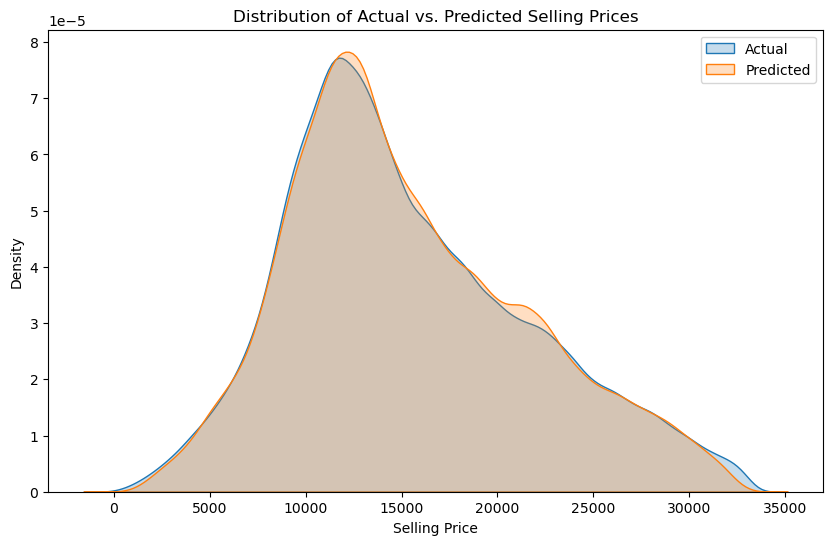

In [64]:
# Distribution of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_train, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.title('Distribution of Actual vs. Predicted Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [69]:
# Calculate MSE and R2
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
   
# Print metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 1721880.39
Root Mean Squared Error (RMSE): 1312.20
R-squared (R2) Score: 0.9579


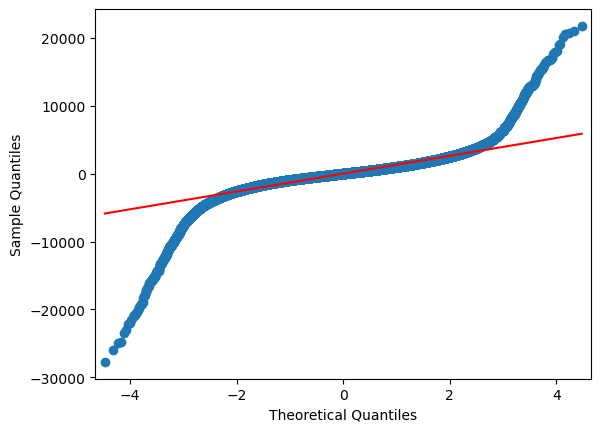

In [70]:
# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.show()

In [66]:
# Save descriptive statistics and OLS results summary to Excel
output_file_path = 'regression_results.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
        # Write descriptive statistics to a new sheet
        data.describe().to_excel(writer, sheet_name='Descriptive_Statistics')

        # Write OLS results summary to a new sheet
        # Extract the summary as string and split into lines
        summary_text = results.summary().as_text()
        summary_lines = summary_text.split('\n')

        # Write each line of the summary to the Excel sheet
        summary_sheet = writer.book.add_worksheet('OLS_Results')
        for i, line in enumerate(summary_lines):
            summary_sheet.write(i, 0, line)